**Predictive Maintenace**

# **DATA ANALYTICS LABORATORY**


---


# PRACTICAL NO. 6

---

**ATHARV KISHOR CHAUDHARI**

*B.E. - B*

*ROLL NO. 08*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
data = pd.read_excel('/content/predictive_maintenance1.xlsx')
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
data = data.drop(["UDI",'Product ID'],axis=1)
data.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


In [6]:
data.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


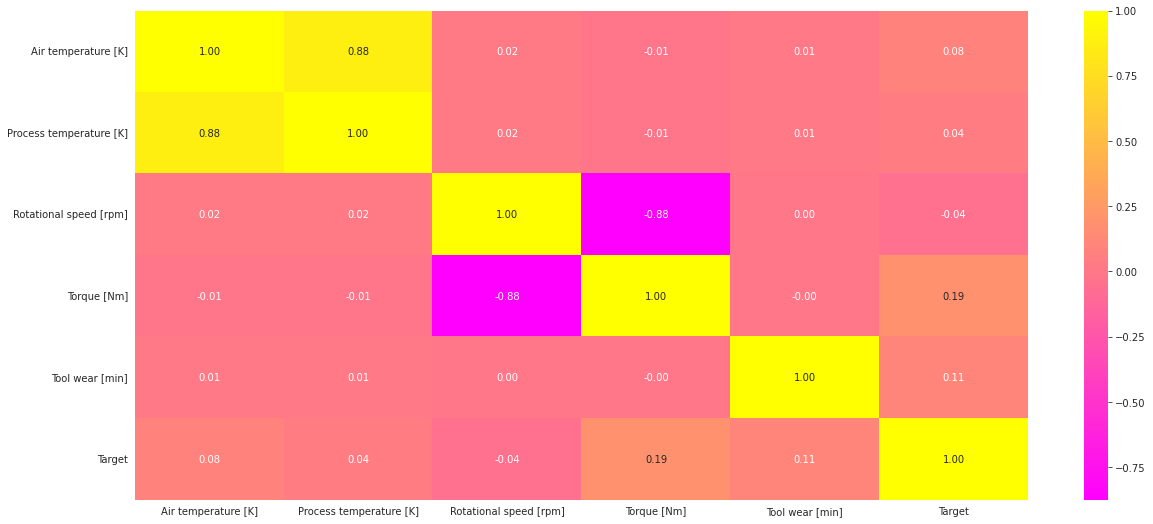

In [7]:
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr,cmap='spring', annot=True, fmt='.2f')

In [8]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
Target                     5.151852
dtype: float64

Skewness measures the deviation of a random variable's given distribution from the normal distribution, which is symmetrical on both sides.
Skewness Analysis are performed to see whether the numerical features are severely skewed or not and this will help us in creating better linear
models.
If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 &
1(positive skewed), the data are slightly skewed. If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the
data are extremely skewed.


Data Preprocessing for Prediction
Before using ML model the data is processed again in 3 steps -
Encoding categorical features
Splitting test & train data
Feature Scaling
Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.We use it on our training
data, and using "fit" it will figure out the unique values and assign a value to it, returns the encoded labels.


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(data['Type'])
data['Type'] = label_encoder.transform(data['Type'])
label_encoder.fit(data['Target'])
data['Target'] = label_encoder.transform(data['Target'])

The test-train split is used to estimate the performance of machine learning algorithms using training data and validate with test data.
test_size : This parameter specifies the size of the testing dataset random_state : Determine the randomness of the splits


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Failure Type','Target'],axis=1),
data['Target'], test_size=0.3, random_state=42)


Feature scaling is a method used to normalize the range of independent variables or features of data and make them closer to each other.
Feature scaling is essential for machine learning algorithms that calculate distances between data (Ex- KNN).

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit and transform the training & test set
X_test = scaler.fit_transform(X_test)


# Prediction : Model development

In [12]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
classifier=[] #to store the model names
imported_as=[] #to store the instances of the models

time : allows to work with time in Python. It allows functionality like getting the current time, pausing the Program from executing.
accuracy_score : Number of correct predictions divided by the Total number of predictions.
classification_report : it is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of
your trained classification model.
Logistic Regression is a supervised learning algorithm that investigates the relationship b/w a dependent and independent variable and
produces results in a binary format which is used to predict the outcome of a categorical variable (Failue or not).


In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() #creating instance
classifier.append('Logistic Regression')
imported_as.append('lr')


# KNN (K-Nearest Neighbour)
KNN is also a supervised machine learning algorithm which is mostly used to solve classification problem statements. It stores all the available
cases and classifies new cases based on similarity measure that means the object is classified by a plurality vote of its neighbors. "K" is the
number of nearest neighbours.


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')


# SVM
Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. The algorithm creates a
line or a hyperplane which separates the data into classes.


In [15]:
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')


# Random Forest
Random Forest is a collection of decision trees which is capable of performing both regression and classification. It provides more stability and
accuracy.

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')


# Naive Bayes
Naive Bayes is a supervised classification technique based on Bayes' Theorem with an assumption of independence among predictors.


In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
classifier.append('Naive Bayes')
imported_as.append('nb')

# Decision Tree
Decision tree is a supservised machine learning algo., mostly used for classication problem where the data is continuously split according to a
certain parameter. The tree can be explained by two entities, named nodes and leaves

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
dt = DecisionTreeClassifier()
classifier.append('Decision Tree')
imported_as.append('dt')
classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')


All Models Imported
Models stored in dataframe called classifiers


In [19]:
display(classifiers)


,Classifier,Imported as
0,Logistic Regression,lr
1,k Nearest Neighbours,knn
2,Support Vector Machine,svc
3,Random Forest,rfc
4,Naive Bayes,nb
5,Decision Tree,dt


In [20]:
class Modelling:
  def __init__(self, X_train, Y_train, X_test, Y_test, models):
    self.X_train = X_train
    self.X_test = X_test
    self.Y_train = Y_train
    self.Y_test = Y_test
    self.models = models

  def fit(self):
    model_acc = []
    model_time= []
    for i in self.models:
      start=time.time()
      if i == 'knn':
        accuracy = []
        for j in range(1,200):
            kn = KNeighborsClassifier(n_neighbors=j)
            kn.fit(self.X_train,self.Y_train)
            predK = kn.predict(self.X_test)
            accuracy.append([accuracy_score(self.Y_test,predK),j])
        temp = accuracy[0]
        for m in accuracy:
            if temp[0] < m[0]:
                temp=m
        i = KNeighborsClassifier(n_neighbors=temp[1])
      i.fit(self.X_train,self.Y_train)
      model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
      stop=time.time()
      model_time.append((stop-start))
      print(i,'has been fit')
    self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})

  def results(self):
    models=self.models_output
    models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
    self.best = models['Models'][0]
    models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
    models['Accuracy']=models['Accuracy'].round(5)*100
    self.models_output_cleaned=models
    return(models)

  def best_model(self,type):
    if type=='model':
      return(self.best)
    elif type=='name':
      return(self.models_output_cleaned['Models'][0])

  def best_model_accuracy(self):
    return(self.models_output_cleaned['Accuracy'][0])

  def best_model_runtime(self):
    return(round(self.models_output_cleaned['Runtime (s)'][0],3))

  def best_model_predict(self,X_test):
    return(self.best.predict(X_test))

  def best_model_clmatrix(self):
    return(classification_report(self.Y_test,self.best.predict(self.X_test)))


models_to_test = [rfc,lr,knn,svc,nb,dt] #models we are testing
classification = Modelling(X_train,y_train,X_test,y_test,models_to_test)
classification.fit()
classification.results()


RandomForestClassifier() has been fit
LogisticRegression() has been fit
KNeighborsClassifier(n_neighbors=1) has been fit
SVC() has been fit
GaussianNB() has been fit
DecisionTreeClassifier() has been fit


,Models,Accuracy,Runtime (s)
0,RandomForestClassifier,98.433,0.754666
1,DecisionTreeClassifier,97.833,0.032332
2,SVC,97.633,0.313826
3,LogisticRegression,97.367,0.031556
4,KNeighborsClassifier,97.033,0.144776
5,GaussianNB,96.367,0.005093


# Conclusion

In [21]:
print('BestModel is:', classification.best_model(type='name'))
print('Accuracy of model:',classification.best_model_accuracy())
print('Training Runtime in seconds',classification.best_model_runtime())
print('Classification Matrix:\n')
print(classification.best_model_clmatrix())

BestModel is: RandomForestClassifier
Accuracy of model: 98.433
Training Runtime in seconds 0.755
Classification Matrix:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.84      0.61      0.71        93

    accuracy                           0.98      3000
   macro avg       0.91      0.80      0.85      3000
weighted avg       0.98      0.98      0.98      3000



The Confusion Matrix is a matrix used to determine the performance of the classification models for a given set of test data. It is used to
visualize important predictive analytics like recall, specificity, accuracy, and precision. Confusion matrices are useful because they give direct
comparisons of values like True Positives, False Positives, True Negatives and False Negatives.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


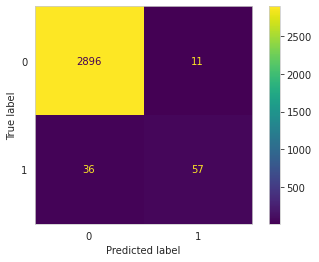

In [22]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
sns.set_style("whitegrid", {"grid.color": "1", "grid.linestyle": " "})
plot_confusion_matrix(classification.best_model(type='model'), X_test, y_test)

# **DATA ANALYTICS LABORATORY**

**ATHARV KISHOR CHAUDHARI**

*B.E. - B*

*ROLL NO. 08*

In [23]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')